In [49]:
import pandas

df = pandas.read_csv(open('LSD.csv'))

In [50]:
# encode column values with numbers

cleanup_columns = {
    'satisfied_compensation': {'Yes': 1, 'No': 0},
    'enjoy_job': {'Never': 0, 'Rarely': 0.25, 'Sometimes (depends on the task)': 0.5, 'Often': 0.75, 'Never a dull moment': 1},
    'for_compensation': {'Yes': 1, 'No': 0},
    'real_world_problem': {
        'A project which doesn’t provide an impressive compensation but is impactful and solves a real-world problem': 1,
        'An internal project which provides better compensation but no real-world impact': 0
    },
    'interesting_work': {
        'A project which doesn’t provide an impressive compensation but is rather interesting to work on (perhaps a little fun too)': 1,
        'an internal project which provides a much more impressive compensation but is a little tedious to work on': 0
    }
}

df = df.replace(cleanup_columns)
df.head()

,time,job,seniority,experience,satisfied_compensation,enjoy_job,for_compensation,real_world_problem,interesting_work,employer_advice
0,2023/04/18 7:13:15 PM GMT+3,Automation Engineer,Junior,< 1 year,0.0,0.50,0,0,1,Develop a better structure for creation and al...
1,2023/04/18 8:38:56 PM GMT+3,Software engineering intern,Intern,< 1 year,1.0,0.75,0,1,0,Give more interesting tasks
2,2023/04/18 9:15:58 PM GMT+3,frontend developer,Junior,< 1 year,0.0,0.25,1,0,0,be kind and pay more
3,2023/04/18 10:36:49 PM GMT+3,Student,Intern,< 1 year,NaN,0.50,0,0,1,Нанять меня блэт
4,2023/04/18 10:37:18 PM GMT+3,Junior Flutter Developer,Junior,< 1 year,1.0,0.75,0,1,1,Provide more interesting and various tasks


In [51]:
levels = set(df["seniority"])
levels

{'Freelancer', 'Intern', 'Junior', 'Middle', 'Senior'}

In [52]:
data = {}

for level in levels:
    data[level] = df[df.seniority == level]

In [53]:
data['Senior']

,time,job,seniority,experience,satisfied_compensation,enjoy_job,for_compensation,real_world_problem,interesting_work,employer_advice
11,2023/04/19 7:11:09 PM GMT+3,Blockchain developer,Senior,8+ years,0.0,0.0,0,1,1,the only thing that can be done is to fire me


In [54]:
data['Freelancer']

,time,job,seniority,experience,satisfied_compensation,enjoy_job,for_compensation,real_world_problem,interesting_work,employer_advice
19,2023/04/20 6:19:22 PM GMT+3,Student,Freelancer,< 1 year,1.0,0.75,0,1,1,"Share profit as a percentage with employees, p..."
24,2023/04/21 2:03:31 PM GMT+3,Software Developer,Freelancer,3 - 5 years,NaN,0.25,1,0,0,$$$


In [55]:
data['Middle']

,time,job,seniority,experience,satisfied_compensation,enjoy_job,for_compensation,real_world_problem,interesting_work,employer_advice
6,2023/04/18 10:38:35 PM GMT+3,WebSky,Middle,3 - 5 years,0.0,0.75,0,1,0,To stop doing too many projects including univ...
8,2023/04/18 10:47:03 PM GMT+3,Flutter-developer,Middle,3 - 5 years,0.0,0.25,0,1,0,-
15,2023/04/20 2:16:05 PM GMT+3,Student (software developer),Middle,3 - 5 years,0.0,0.50,0,1,0,Care about output rather than time spent
16,2023/04/20 3:32:00 PM GMT+3,Blockchain developer,Middle,1 - 2 years,1.0,0.75,0,0,1,NaN
21,2023/04/21 12:21:47 AM GMT+3,TA,Middle,1 - 2 years,0.0,0.75,1,1,1,give me full access to my job


In [56]:
data['Intern']

,time,job,seniority,experience,satisfied_compensation,enjoy_job,for_compensation,real_world_problem,interesting_work,employer_advice
1,2023/04/18 8:38:56 PM GMT+3,Software engineering intern,Intern,< 1 year,1.0,0.75,0,1,0,Give more interesting tasks
3,2023/04/18 10:36:49 PM GMT+3,Student,Intern,< 1 year,NaN,0.50,0,0,1,Нанять меня блэт
13,2023/04/19 7:42:28 PM GMT+3,software developer,Intern,< 1 year,0.0,0.50,0,0,1,more mone


In [57]:
data['Junior']

,time,job,seniority,experience,satisfied_compensation,enjoy_job,for_compensation,real_world_problem,interesting_work,employer_advice
0,2023/04/18 7:13:15 PM GMT+3,Automation Engineer,Junior,< 1 year,0.0,0.50,0,0,1,Develop a better structure for creation and al...
2,2023/04/18 9:15:58 PM GMT+3,frontend developer,Junior,< 1 year,0.0,0.25,1,0,0,be kind and pay more
4,2023/04/18 10:37:18 PM GMT+3,Junior Flutter Developer,Junior,< 1 year,1.0,0.75,0,1,1,Provide more interesting and various tasks
5,2023/04/18 10:37:18 PM GMT+3,author on the product design course,Junior,1 - 2 years,1.0,0.50,1,1,1,give me more money and interesting tasks
7,2023/04/18 10:39:38 PM GMT+3,Flutter developer,Junior,< 1 year,1.0,0.50,0,0,1,"Get clear percentage of profit, to be as a par..."
9,2023/04/19 6:07:27 PM GMT+3,Младший системный инженер,Junior,1 - 2 years,1.0,0.25,1,0,1,Хызы
10,2023/04/19 6:24:49 PM GMT+3,junior information systems developer,Junior,1 - 2 years,1.0,0.50,0,1,1,"Give me some random staff. I mean, not only on..."
12,2023/04/19 7:32:46 PM GMT+3,Frontend,Junior,1 - 2 years,0.0,0.75,1,1,0,Fun
14,2023/04/19 11:34:45 PM GMT+3,IT account manager,Junior,1 - 2 years,0.0,0.50,0,1,1,Provide me motivation program about the levels...
17,2023/04/20 4:26:39 PM GMT+3,Backend developer,Junior,1 - 2 years,1.0,0.75,0,0,1,.


In [58]:
import matplotlib.pyplot as plt

def draw_pie_chart_by_column(column):
    final_data = {}
    for x in column:
        if x in final_data:
            final_data[x] += 1
        else:
            final_data[x] = 1
    final_data

    plt.pie(final_data.values(), labels=final_data.keys())
    plt.show()

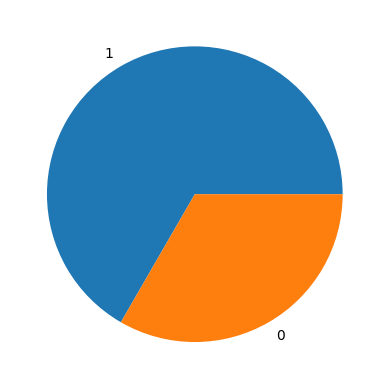

In [63]:
draw_pie_chart_by_column(data['Junior']['interesting_work'])